In [1]:
# import librarires
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.datasets import mnist

In [2]:
# load data from MNIST
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_val, y_val = X_train[50000:60000,:], y_train[50000:60000]
X_train, y_train = X_train[:50000,:], y_train[:50000]
print(X_train.shape)

(50000, 28, 28)


In [3]:
# Reshape for keras
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_val = X_val.reshape(X_val.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

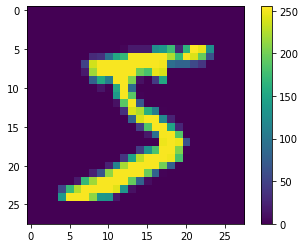

In [4]:
# Print the first image in train datasets
plt.figure()
plt.imshow(X_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

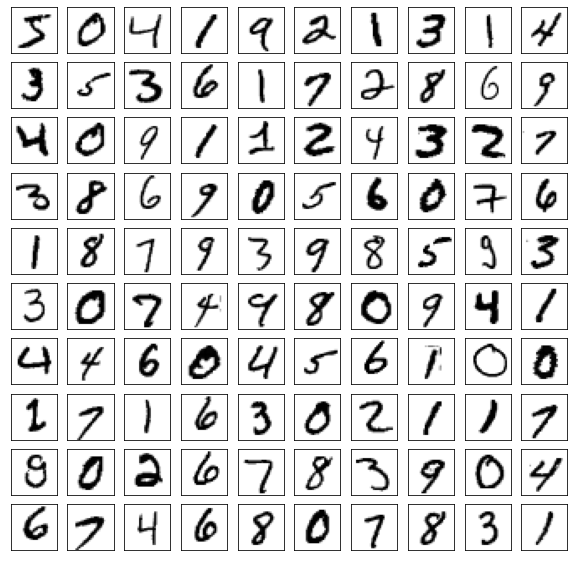

In [5]:
# Print 100 image of train image in matrix[10,10]
plt.figure(figsize=(10,10))
for i in range(100):
    plt.subplot(10,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i],cmap=plt.cm.binary)
plt.show()

In [6]:
# One hot encoding label (Y) 
Y_train = np_utils.to_categorical(y_train,10)
Y_val = np_utils.to_categorical(y_val,10)
Y_test = np_utils.to_categorical(y_test,10)

print('Y BEFORE ENCODING',y_train[0])
print('Y AFTER ENCODING',Y_train[0])

Y BEFORE ENCODING 5
Y AFTER ENCODING [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [8]:
# 5. Định nghĩa model
model = Sequential()
 
# Thêm Convolutional layer với 32 kernel, kích thước kernel 3*3
# dùng hàm sigmoid làm activation và chỉ rõ input_shape cho layer đầu tiên
model.add(Conv2D(32, (3, 3), activation='sigmoid', input_shape=(28,28,1)))



# Thêm Convolutional layer
model.add(Conv2D(32, (3, 3), activation='sigmoid'))

# Thêm Max pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))


# Flatten layer chuyển từ tensor sang vector
model.add(Flatten())

# Thêm Fully Connected layer với 128 nodes và dùng hàm sigmoid
model.add(Dense(128, activation='sigmoid'))

# Output layer với 10 node và dùng softmax function để chuyển sang xác xuất.
model.add(Dense(10, activation='softmax'))

In [9]:

# 6. Compile model, chỉ rõ hàm loss_function nào được sử dụng, phương thức 
# đùng để tối ưu hàm loss function.
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


In [10]:
# 7. Thực hiện train model với data
print(X_train.shape)
print(Y_train.shape)


# 7. Thực hiện train model với data
H = model.fit(X_train, Y_train, validation_data=(X_val, Y_val),
          batch_size=32, epochs=10, verbose=1)

(50000, 28, 28, 1)
(50000, 10)
Epoch 1/10
1563/1563 [==============================] - 31s 20ms/step - loss: 0.7459 - accuracy: 0.7751 - val_loss: 0.0795 - val_accuracy: 0.9806
Epoch 2/10
1563/1563 [==============================] - 29s 19ms/step - loss: 0.0644 - accuracy: 0.9820 - val_loss: 0.0511 - val_accuracy: 0.9855
Epoch 3/10
1563/1563 [==============================] - 30s 19ms/step - loss: 0.0376 - accuracy: 0.9897 - val_loss: 0.0476 - val_accuracy: 0.9855
Epoch 4/10
1563/1563 [==============================] - 30s 19ms/step - loss: 0.0235 - accuracy: 0.9939 - val_loss: 0.0449 - val_accuracy: 0.9868
Epoch 5/10
1563/1563 [==============================] - 30s 19ms/step - loss: 0.0155 - accuracy: 0.9958 - val_loss: 0.0419 - val_accuracy: 0.9872
Epoch 6/10
1563/1563 [==============================] - 30s 19ms/step - loss: 0.0095 - accuracy: 0.9979 - val_loss: 0.0384 - val_accuracy: 0.9882
Epoch 7/10
1563/1563 [==============================] - 30s 19ms/step - loss: 0.0061 - accura

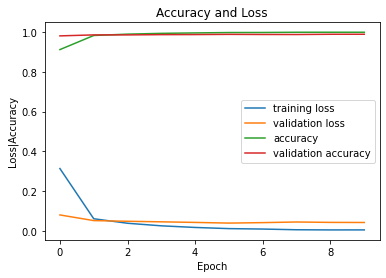

In [12]:
# 8. Vẽ đồ thị loss, accuracy của traning set và validation set
fig = plt.figure()
numOfEpoch = 10
plt.plot(np.arange(0, numOfEpoch), H.history['loss'], label='training loss')
plt.plot(np.arange(0, numOfEpoch), H.history['val_loss'], label='validation loss')
plt.plot(np.arange(0, numOfEpoch), H.history['accuracy'], label='accuracy')
plt.plot(np.arange(0, numOfEpoch), H.history['val_accuracy'], label='validation accuracy')
plt.title('Accuracy and Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss|Accuracy')
plt.legend()

In [13]:

# 9. Đánh giá model với dữ liệu test set
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

[0.03769887238740921, 0.9886999726295471]


Giá trị dự đoán:  1


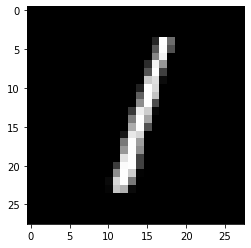

In [19]:
# 10. Dự đoán ảnh
plt.imshow(X_test[2].reshape(28,28), cmap='gray')


y_predict = model.predict(X_test[2].reshape(1,28,28,1))
print('Giá trị dự đoán: ', np.argmax(y_predict))